<h3> Creando y Probando Estrategias Simples de Momentum/Contrario</h3>
Obteniendo los datos

En esta y en la próxima lección vamos a crear y probar una simple estrategia contraria, usando el
instrumento EURUSD tomando en cuenta también los costos del trading, lo cual es muy importante.  
En primer lugar se deben obtener y preparar los datos e importar algunas librerías tales como:
pandas, numpy y matplotlib. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = ["time"])
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


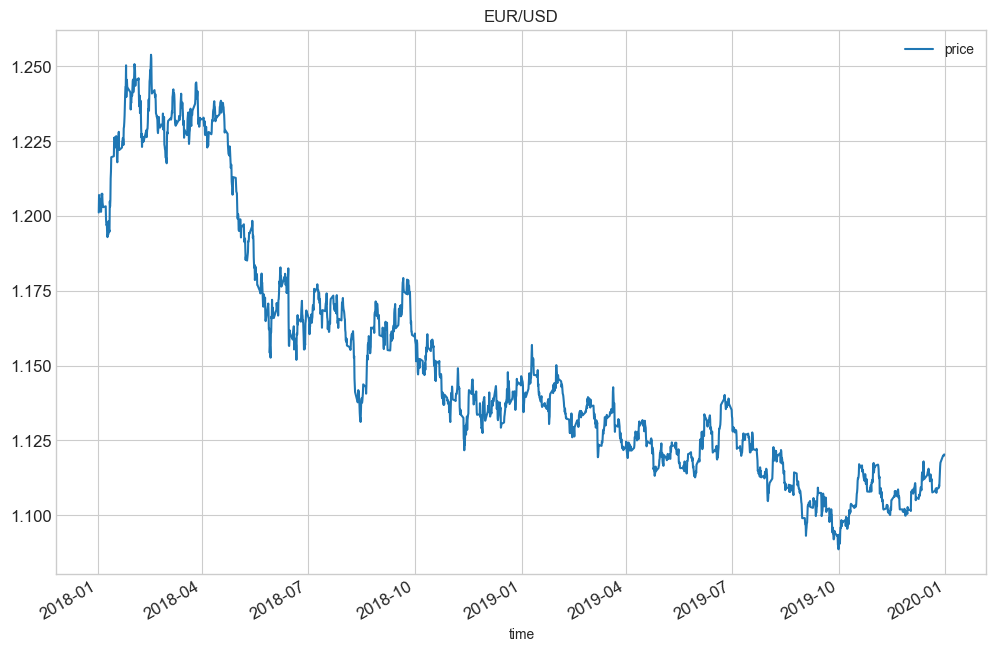

In [4]:
 #primero graficar los datos
data.plot(figsize = (12,8), title = "EUR/USD", fontsize = 12 )
plt.show()

En la gráfica anterior se puede apreciar una depreciación del instrumento del 2018 hasta el
final del 2019.  
También podemos seleccionar un mes en particular, por ejemplo junio de 2019, y crear una gráfica con
más detalle.

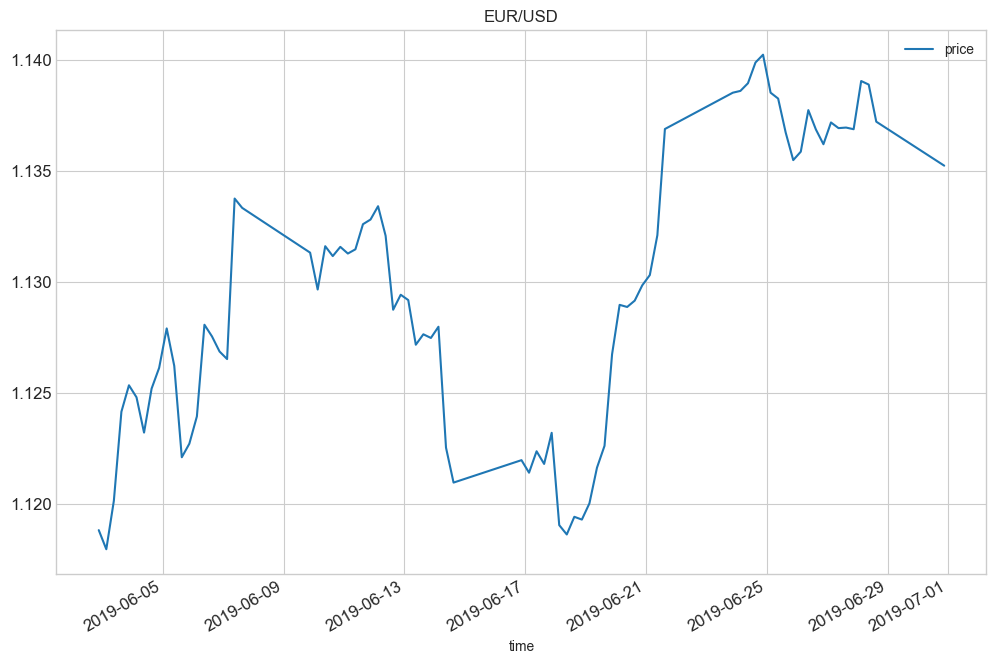

In [5]:
data.loc["2019-06"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

Las líneas rectas que se observan en la gráfica de arriba corresponden a los fines de
semana en los cuales el FOREX no opera.  

A continuación se calcula el logaritmo de los rendimientos y se le agrega otra columna al dataframe data:

In [6]:
data["returns"] = np.log(data.div(data.shift(1)))
data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [7]:
#elimino las filas con NaN
data.dropna(inplace=True)

<h3>Definición de una simple Estrategia Contraria (window = 3)</h3>

Esta estrategia va a utilizar SMA con un valor de período de 3, lo cual implica calcular la
media con los valores de los tres precios recientes.

In [8]:
window = 3

In [9]:
data

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [10]:
data["returns"].rolling(window).mean()

time
2018-01-02 04:00:00+00:00             NaN
2018-01-02 10:00:00+00:00             NaN
2018-01-02 16:00:00+00:00    1.272676e-03
2018-01-02 22:00:00+00:00   -6.537454e-04
2018-01-03 04:00:00+00:00   -1.702470e-04
                                 ...     
2019-12-29 22:00:00+00:00    1.808598e-03
2019-12-30 04:00:00+00:00    1.085156e-03
2019-12-30 10:00:00+00:00    7.492899e-04
2019-12-30 16:00:00+00:00   -1.484453e-17
2019-12-30 22:00:00+00:00    1.234956e-04
Name: returns, Length: 2069, dtype: float64

En los datos de arriba, las primeras 2 filas tienen NaN porque el método rolling() con una ventana de 3 necesita al menos 3 filas para calcular el promedio. La tercera fila (2018-01-02) presenta un valor numérico de 0.001272676 que corresponde al promedio de los valores return de esta y las 2 filas anteriores. Además, obviamente este valor promedio es positivo.  
El próximo dia (la próxima fila o timestamp) el valor promedio es negativo y así sucesivamente se observa una alternancia (no periódica) de valores posiivos y negativos de las medias de 3 períodos. Esto constiuye la base de la estrategia contraria que deseamos implementar:  


Si el retorno promedio más reciente es positivo, entonces asumimos una posición corta -1, y si la media más reciente es negativa tomamos una posición larga +1.  
En consecuencia, con el siguiente código se crea la columna "position" para tener en cuenta las posiciones que iremos asumiendo con la estrategia.  
El código es:

In [11]:
data["position"] = -np.sign(data["returns"].rolling(window).mean())
data

,price,returns,position
time,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0


En la celda anterior el método np.sign() devuelve el signo de su argumento, es decir devuelve
positivo o negativo (+/- 1). Notar que la declaración implica la devolución del negativo del resultado, de tal manera que si el rendimiento medio es positivo (+1) la posición será negativa (-1) y viceversa, siendo ésta la única diferencia entre la más simple estrategia en contrario (o contraria) y una simple estrategia de momentum.

Después de crearse la columna de posiciones aparecen la serie de números (1s) positivos y negativos que indican la toma de posiciones larga y corta.

<h3>Estrategia Vectorizada de Backtesting</h3>
En una lección anterior fué estudiada el método de backtesting vrctorizado (BV), donde se usó código de pandas para comparar nuestra estrategia con B/H r(ecordar que el método Buy and Hold corresponde a la implementación que da lugar a la columna "returns"). En BV se calculan métricas de realización tales como realización absoluta, superioridad, retorno del riesgo, etc.

Hasta aquí hemos definido nuestra estrategia y creado las posiciones, es decir, el BV siempre funciona de la misma forma.

Usando el dataframe data donde ya se han calulado y tabulado antes el precio, rendimientos (returns) y posición (position). Podemos observar aqui los precios de cierre y en consecuencia al final de cada período de 6 horas podemos definir la posición que aplica para el período que sigue inmediatamente.  
Para esto tenemos que desplazar la posición en un timestamp y luego multiplicar por la columna returns, obteniendo así el rendimiento de la estrategia. Entonces creamos una nueva columna "strategy".

In [12]:
data["strategy"] = data.position.shift(1) * data["returns"]
data 

,price,returns,position,strategy
time,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718
...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138


Observando los datos anteriores que corresponden a una variación de precios de cierre de 5 horas.  
La primera posición es corta (2018-01-02) y por lo tanto nuestra estrategia devuelve un rendimiento positivo y B/H uno negativo, entonces tenemos una posición larga.  
Además, B/H y la estrategia tienen exactamente los mismos rendimientos; y así sucesivamente.  

A continuación se eliminan las primeras filas que no tienen valores (que tienen NaN):

In [13]:
data.dropna(inplace=True)
data

,price,returns,position,strategy
time,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004
...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138


Y ahora como estamos trabajando con el logaritmo natural de los rendimientos, simplemente podemos sumar estos logaritmos para obtener la realización absoluta tanto de B/H como de nuestra estrategia.

In [14]:
data[["returns", "strategy"]].sum()

returns    -0.073498
strategy    0.096236
dtype: float64

Entonjces en 2 añoa (2018 y 2019) B/H tiene un rendimiento negativo de 7.35% y la estrategia produce casi 10% positivo.

También podemos calcular el valor de un dolar invertido después de transcurrido el mismo lapso de tiempo con el método apply(np.exp):

In [15]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.929138
strategy    1.101019
dtype: float64

Los valores anteriores muestran que B/H convierte un dólar en 0.92 dólares en cambio con nuestra estrategia obtenemos una ganancia de 1 dólar y 10 centavos.   

A continuación vamos a crear 2 columnas adicionales: los rendimientos acumulados que produce B/H y los rendimientos acumulados de nuestra estrategia:

In [18]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [19]:
data

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420


En los valores anteriores observamos que iniciamos con un valor de 1 en el primer timestamp y finalizamos con 0.92 para B/H y 1.10 para la estrategia.  

Es conveniente graficar para visualizar y comparar ambos comportamientos, para esto graficamos las columnas creturns y cstrategy:

<function matplotlib.pyplot.show(close=None, block=None)>

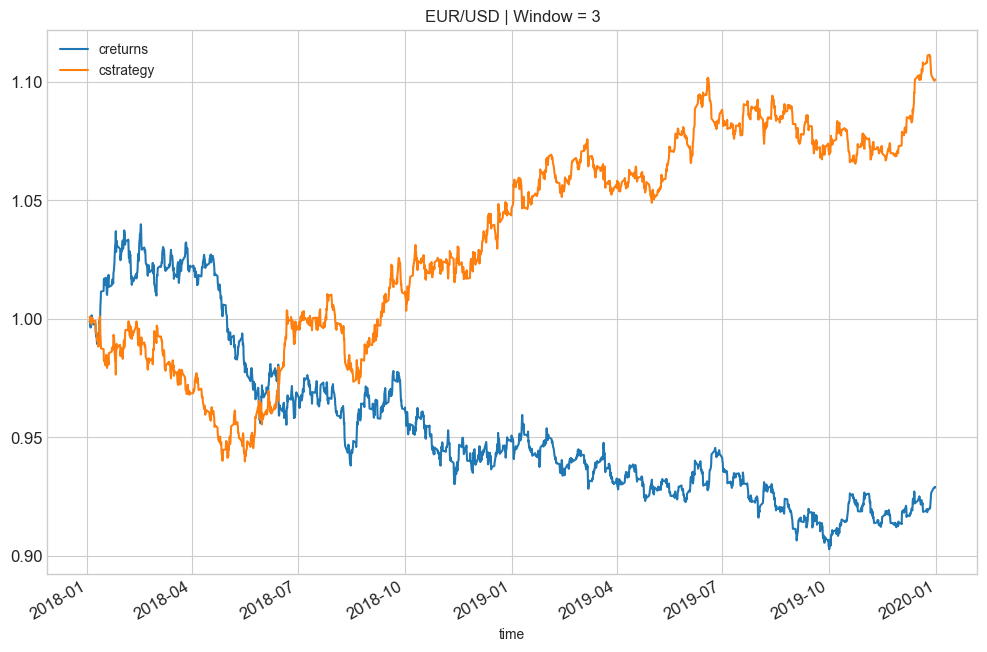

In [20]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8),
                title = "EUR/USD | Window = {}".format(window), fontsize = 12 )
plt.show

En la gráfica de arriba la estrategia se representa en naranja con una ventana de 3 y esta obviamente sobrepasa a B/H, esto ocurre después de los primeros 6 o 7 meses. Antes de esto la situación es al contrario, es decir, El rendimiento de B/H sobrepasa el rendimiento de nuestra estrategia.  

Realmente, esta no es una estrategia muy conveniente. De cualquier manera aqui se usó una ventana de 3, pero esto se podría cambiar lo cual se va a hacer en la próxima lección.
